# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image

# Helper functions

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# Load data

In [4]:
df4 = pd.read_csv('data/df3.csv')

In [5]:
df4.head()

,id,gender,age,region_code,policy_sales_channel,previously_insured,annual_premium,vintage,vehicle_age,vehicle_damage,response
0,1,Male,44,28.0,26.0,0,40454.0,217,> 2 Years,1,1
1,2,Male,76,3.0,26.0,0,33536.0,183,1-2 Year,0,0
2,3,Male,47,28.0,26.0,0,38294.0,27,> 2 Years,1,1
3,4,Male,21,11.0,152.0,1,28619.0,203,< 1 Year,0,0
4,5,Female,29,41.0,152.0,1,27496.0,39,< 1 Year,0,0


## Checking dimensions and types

In [6]:
df4.shape

(381109, 11)

In [7]:
df4.dtypes

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
previously_insured        int64
annual_premium          float64
vintage                   int64
vehicle_age              object
vehicle_damage            int64
response                  int64
dtype: object

# Exploratory data analysis

## Bivariate analysis

### h1: Clientes com 20 a 30 idade tem carros com mais danos

<ipython-input-8-fa547a161b4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h1['age_binned'] = pd.cut(h1['age'],bins=bins)


<AxesSubplot:xlabel='age_binned', ylabel='count'>

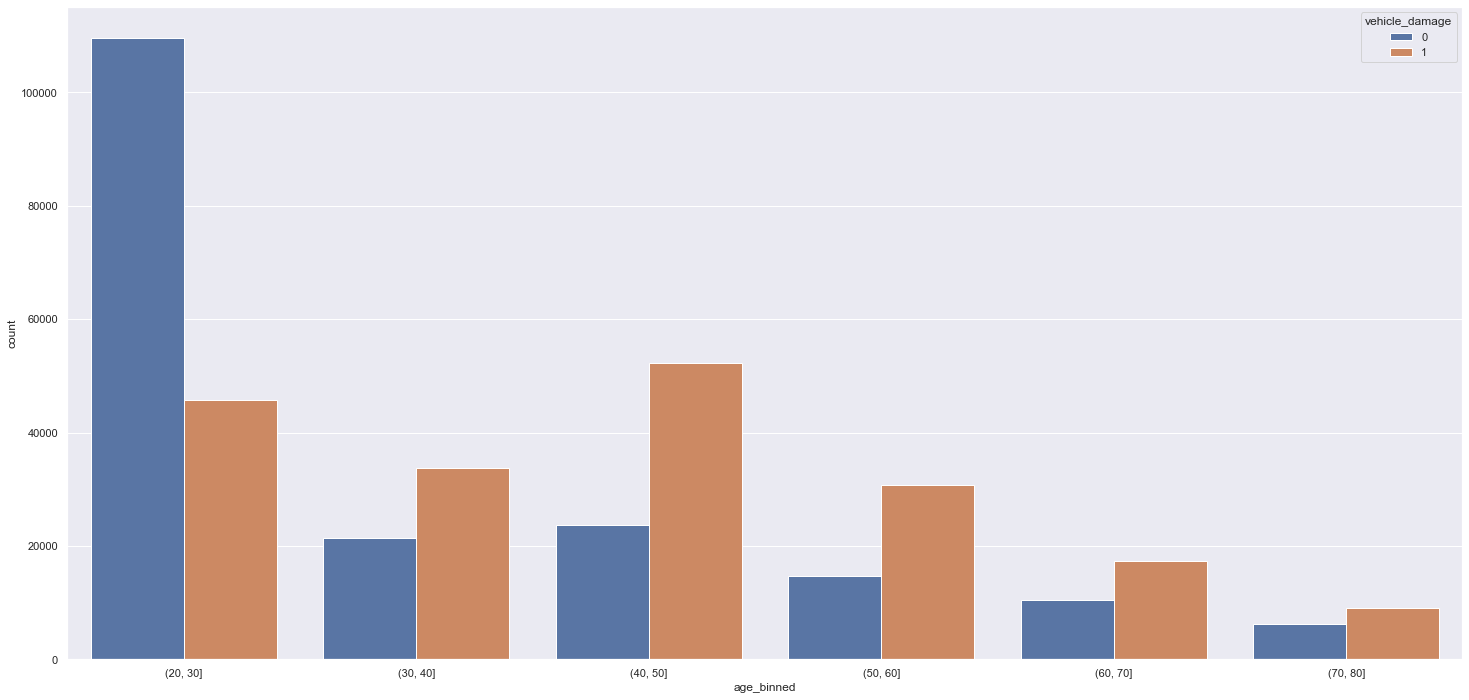

In [8]:
h1 = df4[['age','vehicle_damage']]
bins = list(np.arange(20,86,10))
h1['age_binned'] = pd.cut(h1['age'],bins=bins)
#h1[['age_binned','vehicle_damage']].groupby('age_binned').size()
sns.countplot(x='age_binned',data=h1[['age_binned','vehicle_damage']],hue='vehicle_damage')

Falso, a faixa etária que possuim carros mais danificados é a dos 40 a 50 anos, seguido dos 20 a 30

### h2: clientes com mais de 40 anos tendem a já ter seguro veicular

<ipython-input-9-2c0ef1158591>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h2['aux'] = h2['age'].apply(lambda x: 'older than 40' if x >=40 else 'less than 40')


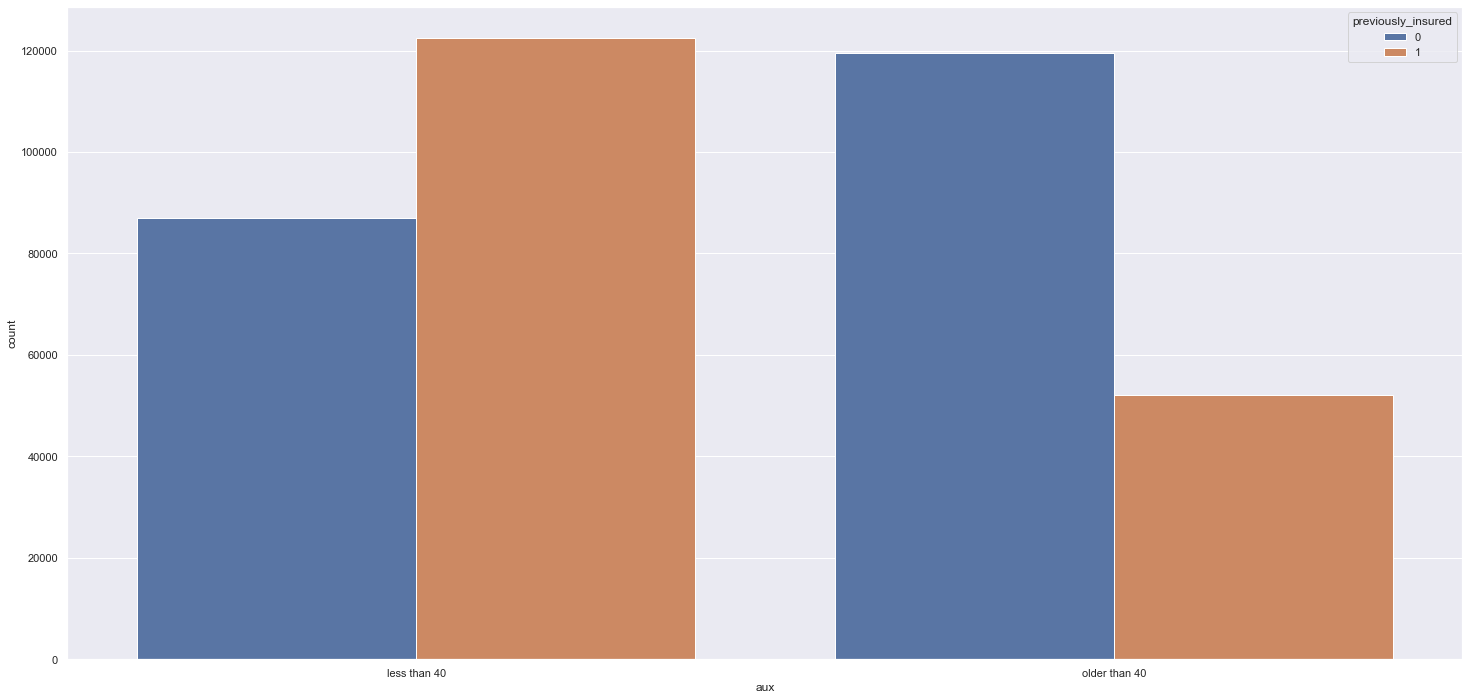

In [9]:
h2= df4[['age','previously_insured']]
h2['aux'] = h2['age'].apply(lambda x: 'older than 40' if x >=40 else 'less than 40')
sns.countplot(x='aux',data=h2,hue='previously_insured',order=['less than 40','older than 40']);

Falso, pessoa com mais de 40 anos não possuem um seguro anterior mais do que aqueles com menos de 40

### h3: quantos mais velho o cliente mais tendem a responder que sim ao seguro

<AxesSubplot:xlabel='age', ylabel='response'>

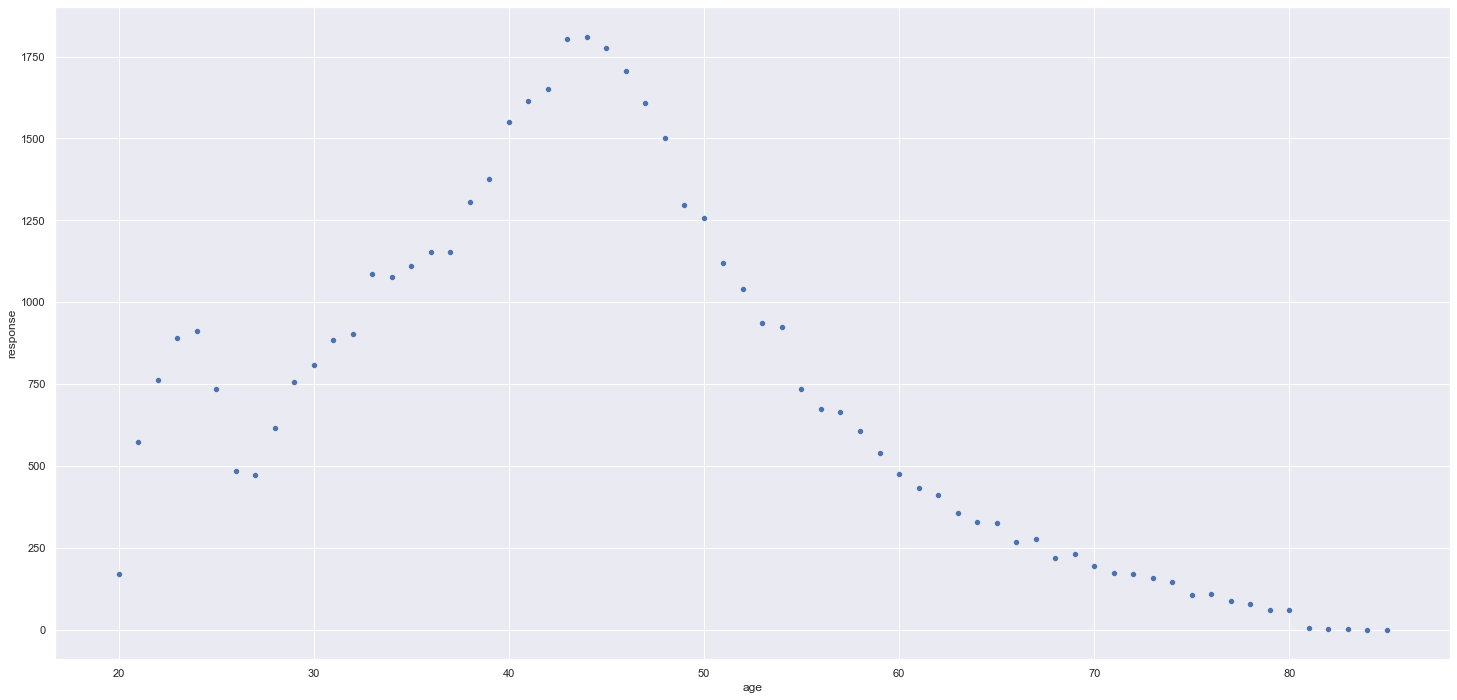

In [10]:
h3 = df4[['age','response']].groupby('age').sum().reset_index()
sns.scatterplot(x='age',y='response',data=h3)

**Falso, ao contrário da proposta quanto mais velho o cliente menos tendência ele apresenta interrese no seguro, boa parte dos que tem interrese estão na faixa dos 30 a 55**

### h4: clientes com mais de 35 anos gastam mais anualmente

<AxesSubplot:>

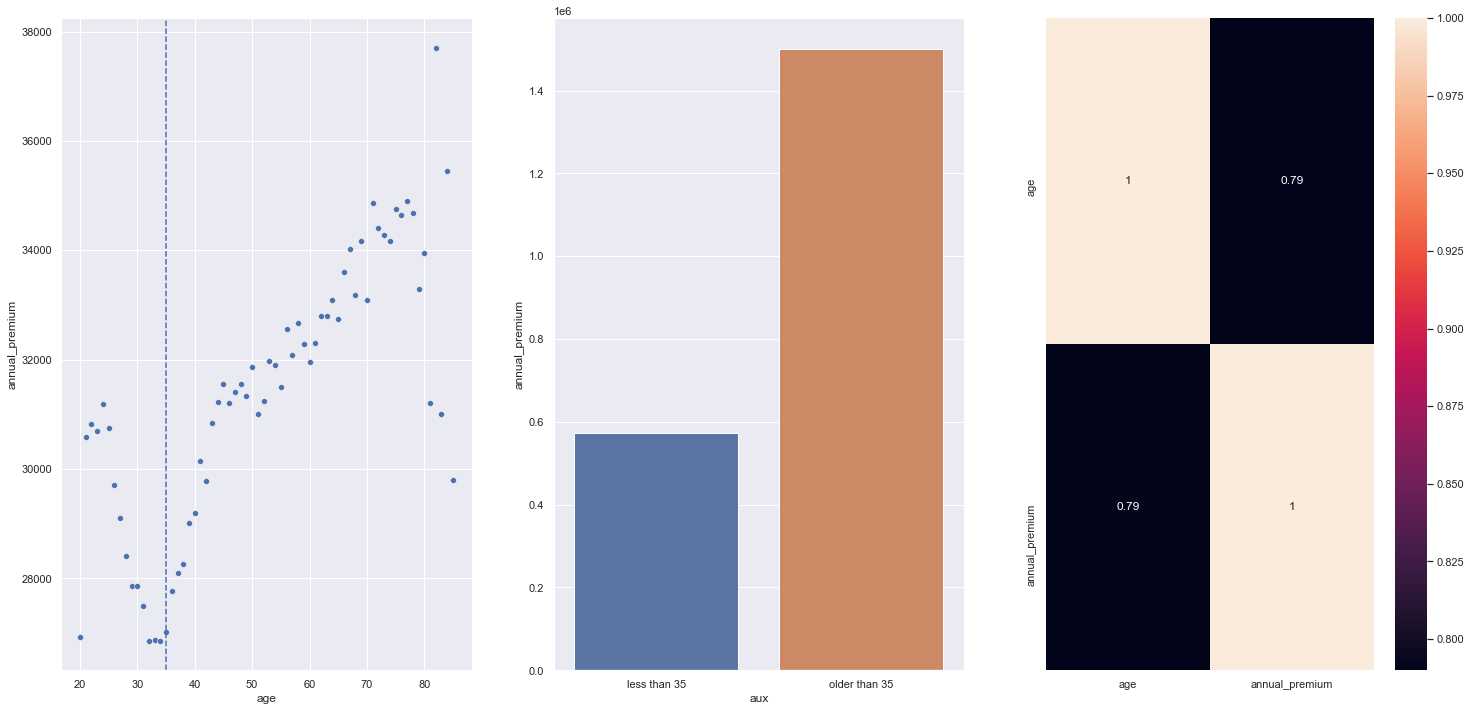

In [36]:
h4 = df4[['age','annual_premium']].groupby('age').mean().reset_index()
h4['aux'] = h4['age'].apply(lambda x: 'older than 35' if x >=40 else 'less than 35')
h4_b = h4[['aux','annual_premium']].groupby('aux').sum().reset_index()
h4_b
plt.subplot(131)
sns.scatterplot(x='age',y='annual_premium',data=h4)
plt.axvline(35,linestyle='--')
plt.subplot(132)
sns.barplot(x='aux',y='annual_premium',data=h4_b)
plt.subplot(133)
sns.heatmap(h4[['age','annual_premium']].corr(method='pearson'),annot=True)

Verdadeiro, Clientes com mais de 35 anos apresentam têndencia e montante total de gastos maiores do que aqueles com menos, provavalmente devido a um aumento no poder aquisitivo conforme a idade

**seria o caso da creiação de uma nova feature, "annual_premium_mean_age" num próximo ciclo**